# # Análisis de Clientes con K-Means Clustering
# Dataset: Mall_Customers.csv

In [1]:
# 1. Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# 2. Cargar datos
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000     

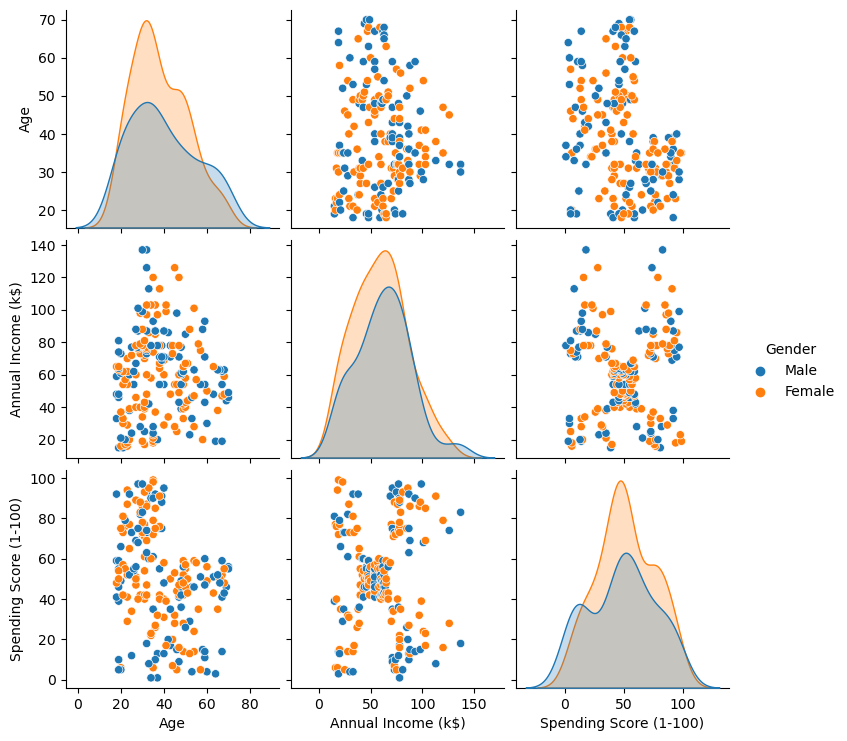

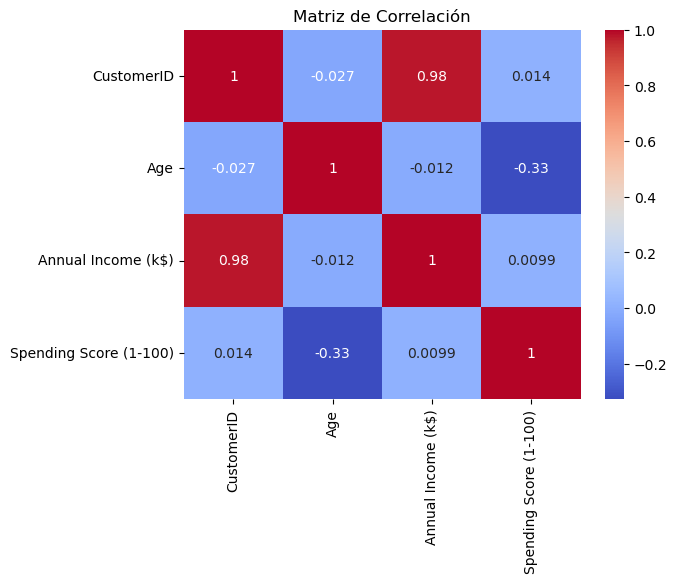

In [3]:
# 3. Exploración básica
print(df.info())
print(df.describe(include='all'))
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender")
plt.show()

# Correlaciones corregidas
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [4]:
# 4. Limpieza y preprocesamiento
# Codificar variable categórica
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Verificar valores nulos
print(df.isnull().sum())

# Eliminar CustomerID
df_clean = df.drop("CustomerID", axis=1)

# Escalado de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# 5. Selección de características más relevantes
X = df_clean.drop("Spending Score (1-100)", axis=1)
y = df_clean["Spending Score (1-100)"]

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

for feature, score in zip(X.columns, scores):
    print(f"{feature}: {score:.2f}")

Gender: 1.09
Age: 1.07
Annual Income (k$): 1.81


  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0


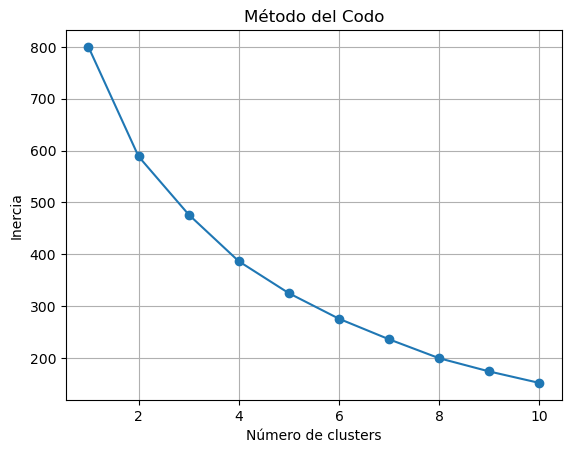

In [6]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [11]:
# 7. Entrenamiento del modelo
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [8]:
# 8. Evaluación del modelo
silhouette = silhouette_score(scaled_data, df['Cluster'])
calinski = calinski_harabasz_score(scaled_data, df['Cluster'])

print(f"Coeficiente de Silhouette: {silhouette:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski:.2f}")

Coeficiente de Silhouette: 0.317
Índice de Calinski-Harabasz: 71.21


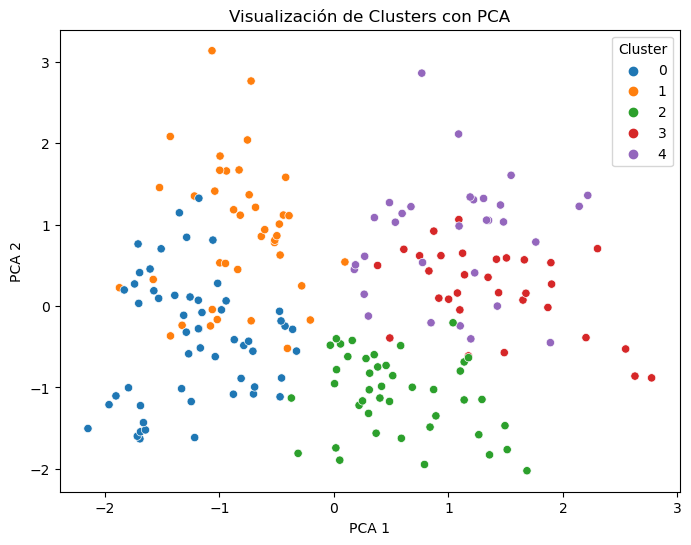

In [9]:
# 9. Visualización de resultados
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='tab10')
plt.title('Visualización de Clusters con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [10]:
# 10. Resumen por cluster
print(df.groupby('Cluster').mean())

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        102.854545  0.000000  28.345455           60.800000   
1        103.375000  1.000000  28.250000           62.000000   
2         66.651163  0.000000  48.720930           46.186047   
3         72.612903  1.000000  55.903226           48.774194   
4        167.451613  0.548387  40.419355           90.000000   

         Spending Score (1-100)  
Cluster                          
0                     68.654545  
1                     71.675000  
2                     39.674419  
3                     38.806452  
4                     15.741935  
